# **Task 2 : Exploring Supervised Machine Learning**

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just one variables.

I used the following algorithms
- Linear regression
- Ridge Algorithm
- SVM using linear kernel
- Lasso Algorithm

At the end of the file you'll get the best model out of the above mentioned algorithms 

### **Importing the libraries**

In [110]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### **Importing dataset from the link**

In [111]:
dataset = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

print("\nFirst 10 records of data:\n")
dataset.head(10)

Data imported successfully

First 10 records of data:



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [112]:
print('\nDescription about data :' )
dataset.describe()


Description about data :


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

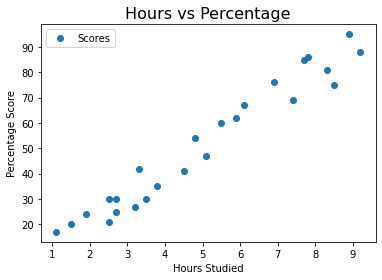

In [113]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

This step involves dividing the data into **inputs(X)** and **outputs(y)**.

In [114]:
X = dataset.iloc[:, 0:-1].values  
y = dataset.iloc[:, -1].values

Now we have to split the data into **X_train, X_test, y_train, y_test** using **train_test_split()** from model_selection module in scikit-learn.

Where **X_train and y_train** are used to train the model and **X_test and y_test** are used to test the data.

In [115]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# **Linear Regression Algorithm**

### **Training the data using linear regression**
We have split our data into training and testing sets, and now is finally the time to train our test data. 

In [116]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


Plotting the training data and the linear regressor

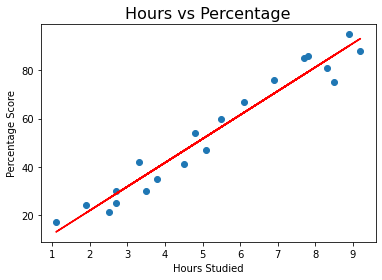

In [117]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [118]:
print('intercept = ' + str(regressor.intercept_))
print('coefficient = ' + str(*regressor.coef_))

intercept = 2.018160041434662
coefficient = 9.91065648064224


### **Predicting test set results**

In [119]:
y_pred = regressor.predict(X_test) # Predicting the scores
# Comparing Actual vs Predicted
df = pd.DataFrame({'Hours':X_test.flatten(), 'Actual': y_test, 'Predicted': y_pred})  
df 

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


Plotting the testing data and linear regressor 

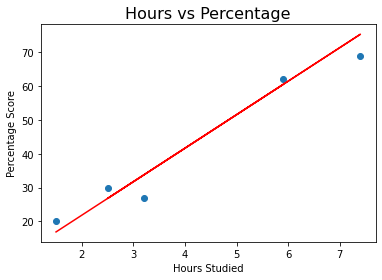

In [120]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),color='red')
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Predicting output for **9.25 hours** of work

In [121]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the Linear regression model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. I used **Mean absolute error** and **r2 score**

In [122]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('r2_score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
r2_score: 0.9454906892105354


# **SVM using linear kernel**

### **Training the data using SVM linear kernel**

In [123]:
from sklearn.svm import SVR
svm_reg = SVR(kernel = 'linear')
svm_reg.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Plotting the training data and svm regressor

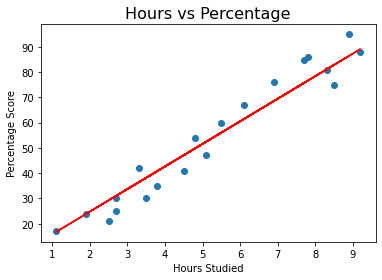

In [124]:
plt.scatter(X_train,y_train)
plt.plot(X_train,svm_reg.predict(X_train), color='red')
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [125]:
print('intercept = ' + str(*svm_reg.intercept_))
print('coefficient = ' + str(*svm_reg.coef_[0]))

intercept = 6.918749954070843
coefficient = 8.937500066519451


### **Predicting test set results**

In [126]:
svm_y_pred = regressor.predict(X_test) # Predicting the scores
# Comparing Actual vs Predicted
df_svm = pd.DataFrame({'Hours':X_test.flatten(), 'Actual': y_test, 'Predicted': svm_y_pred})  
df_svm

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


plotting testing data and regressor

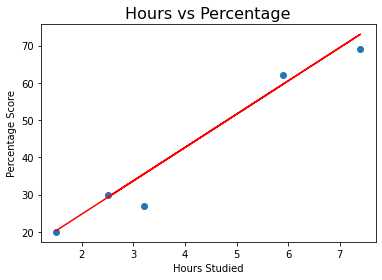

In [127]:
plt.scatter(X_test,y_test)
plt.plot(X_test,svm_reg.predict(X_test),color='red')
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Predicting output for **9.25 hours** of work

In [128]:
hours = 9.25
svm_own_pred = svm_reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the Linear regression model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. I used **Mean absolute error** and **r2 score**

In [129]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svm_y_pred))
print('r2_score:', metrics.r2_score(y_test, svm_y_pred))

Mean Absolute Error: 4.183859899002982
r2_score: 0.9454906892105354


Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

# **Ridge Algorithm**

### **Training the data using linear Ridge Model**
We have split our data into training and testing sets, and now is finally the time to train our test data. 

In [130]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_test_pred = [] # To store test set predictions for various alphas

Alpha is Regularization strength. Regularization improves the conditioning of the problem and reduces the variance of the estimates i.e., helps reduce overfitting. Larger values specify stronger regularization.

Trying differerent alphas and storing in **ridge_test_pred**

In [131]:
for alpha in np.arange(0, 100, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    # prediction
    ridge_test_pred.append(ridge_reg.predict(X_test))

Finding the **mean squared error** for all the alphas for test set and storing in **ridge_mse_test**

In [132]:
ridge_mse_test = [metrics.mean_squared_error(y_test, p) for p in ridge_test_pred]

Plotting mean squared error vs alpha values

Text(0, 0.5, 'MSE')

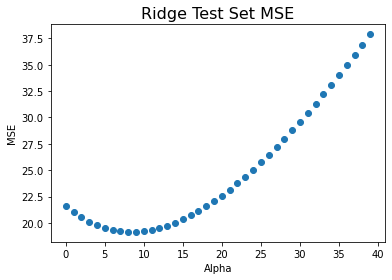

In [133]:
plt.plot(ridge_mse_test[:40], 'o')
plt.title("Ridge Test Set MSE", fontsize=16)
plt.xlabel("Alpha")
plt.ylabel("MSE")

Finding the best alpha value where **mean squared error** is low

In [134]:
print('Best alpha with low error : '+ str(ridge_mse_test.index(min(ridge_mse_test))))

Best alpha with low error : 8


Therefore we retrain our model with **alpha=8**

In [135]:
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Plotting the training data and the Redge regressor

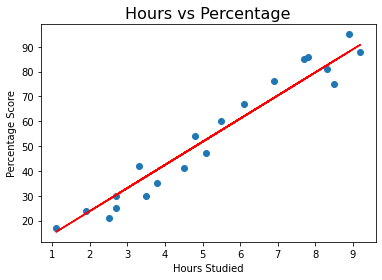

In [136]:
plt.scatter(X_train,y_train)
plt.plot(X_train,ridge_reg.predict(X_train), color='red')
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [137]:
print('intercept = ' + str(ridge_reg.intercept_))
print('coefficient = ' + str(*ridge_reg.coef_))

intercept = 5.175878633102272
coefficient = 9.308038428797277


### **Predicting test set results**

In [138]:
ridge_y_pred = ridge_reg.predict(X_test) # Predicting the scores
# Comparing Actual vs Predicted
df_ridge = pd.DataFrame({'Hours':X_test.flatten(), 'Actual': y_test, 'Predicted': ridge_y_pred})  
df_ridge

,Hours,Actual,Predicted
0,1.5,20,19.137936
1,3.2,27,34.961602
2,7.4,69,74.055363
3,2.5,30,28.445975
4,5.9,62,60.093305


Plotting the test data and redge regressor


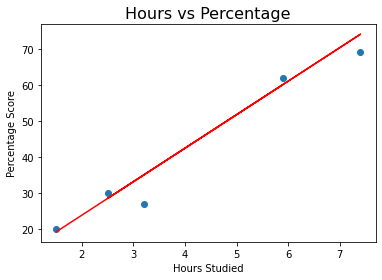

In [139]:
plt.scatter(X_test,y_test)
plt.plot(X_test,ridge_reg.predict(X_test),color='red')
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Predicting output for **9.25 hours** of work

In [140]:
hours = 9.25
ridge_own_pred = ridge_reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the Ridge model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. I used **Mean absolute error** and **r2 score**

In [141]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_y_pred))
print('r2_score:', metrics.r2_score(y_test, ridge_y_pred))

Mean Absolute Error: 3.4679496534111665
r2_score: 0.9516770501893197


# **Lasso Algorithm**

### **Training the data using linear Ridge Model**
We have split our data into training and testing sets, and now is finally the time to train our test data. 

In [142]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=3)
lasso_reg.fit(X_train, y_train)
lasso_test_pred = [] # To store test set predictions for various alphas

Alpha is Regularization strength. Regularization improves the conditioning of the problem and reduces the variance of the estimates i.e., helps reduce overfitting. Larger values specify stronger regularization.

Same as in Ridge algorithm, we are trying differerent alphas and storing in **lasso_test_pred**

In [143]:
for alpha in np.arange(0, 100, 1):
    # training
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    # prediction
    lasso_test_pred.append(lasso_reg.predict(X_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308.9818237731452, tolerance: 1.275495
  positive)


The above warning is due to aplha=0 which means there is **no regularisation**

Finding the **mean squared error** for all the alphas for test set and storing in **lasso_mse_test**

In [144]:
lasso_mse_test = [metrics.mean_squared_error(y_test, p) for p in lasso_test_pred]

Plotting mean squared error vs alpha values

Text(0, 0.5, 'MSE')

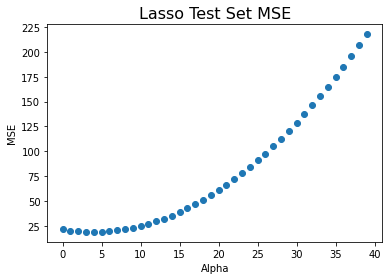

In [145]:
plt.plot(lasso_mse_test[:40], 'o')
plt.title("Lasso Test Set MSE", fontsize=16)
plt.xlabel("Alpha")
plt.ylabel("MSE")

Finding the best alpha value where **mean squared error** is low

In [146]:
print('Best alpha with low error : '+ str(lasso_mse_test.index(min(lasso_mse_test))))

Best alpha with low error : 4


Therefore we retrain our model with **alpha=4**

In [147]:
lasso_reg = Lasso(alpha=4)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Plotting the training data and the Lasso Regressor

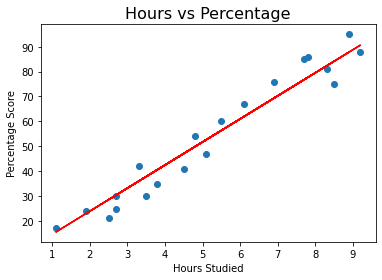

In [148]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lasso_reg.predict(X_train), color='red')
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [149]:
print('intercept = ' + str(lasso_reg.intercept_))
print('coefficient = ' + str(*lasso_reg.coef_))

intercept = 5.41062410980188
coefficient = 9.263239673701932


### **Predicting test set results**

In [150]:
lasso_y_pred = lasso_reg.predict(X_test) # Predicting the scores
# Comparing Actual vs Predicted
df_lasso = pd.DataFrame({'Hours':X_test.flatten(), 'Actual': y_test, 'Predicted': lasso_y_pred})  
df_lasso

,Hours,Actual,Predicted
0,1.5,20,19.305484
1,3.2,27,35.052991
2,7.4,69,73.958598
3,2.5,30,28.568723
4,5.9,62,60.063738


Plotting the test data and Lasso regressor


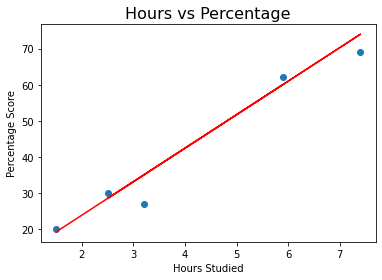

In [151]:
plt.scatter(X_test,y_test)
plt.plot(X_test,lasso_reg.predict(X_test),color='red')
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Evaluating the Lasso model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. I used **Mean absolute error** and **r2 score**

In [152]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_y_pred))
print('r2_score:', metrics.r2_score(y_test, ridge_y_pred))

Mean Absolute Error: 3.4679496534111665
r2_score: 0.9516770501893197


# **Conclusion**

In [153]:
print('r2_score linear regression:', metrics.r2_score(y_test, y_pred))
print('r2_score svm:', metrics.r2_score(y_test, svm_y_pred))
print('r2_score Ridge:', metrics.r2_score(y_test, ridge_y_pred))
print('r2_score Lasso:', metrics.r2_score(y_test, lasso_y_pred))

r2_score linear regression: 0.9454906892105354
r2_score svm: 0.9454906892105354
r2_score Ridge: 0.9516770501893197
r2_score Lasso: 0.9516866686682858


In [154]:
print('Lasso has higher accuracy')

Lasso has higher accuracy
